In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv(r'C:\Users\renuk\Downloads\Musical_instruments_reviews.csv',)

In [3]:
dataset

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
dataset.reviewText.fillna("",inplace=True)

In [6]:
columns = ['reviewText', 'overall','summary']
dataset = dataset[columns]
dataset.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [7]:
dataset['review'] = dataset['reviewText'] + ' ' + dataset['summary']
dataset.drop(['reviewText', 'summary'], axis = 1, inplace = True)
dataset

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,overall,review
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...
...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S..."
10257,5.0,I've been thinking about trying the Nanoweb st...
10258,4.0,I have tried coated strings in the past ( incl...
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [8]:
dataset.nunique()

overall        5
review     10261
dtype: int64

In [9]:
dataset['target'] = dataset.overall.apply(lambda x: 1 if x>=4.0 else 0)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,review,target
0,5.0,"Not much to write about here, but it does exac...",1
1,5.0,The product does exactly as it should and is q...,1
2,5.0,The primary job of this device is to block the...,1
3,5.0,Nice windscreen protects my MXL mic and preven...,1
4,5.0,This pop filter is great. It looks and perform...,1


In [10]:
dataset.target.value_counts()

1    9022
0    1239
Name: target, dtype: int64

In [11]:
dataset['review'][5]

'So good that I bought another one.  Love the heavy cord and gold connectors.  Bass sounds great.  I just learned last night how to coil them up.  I guess I should read instructions more carefully.  But no harm done, still works great! The Best Cable'

### Text Preproessing and Text Mining

In [12]:
#Cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', str(dataset['review'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Visualzation

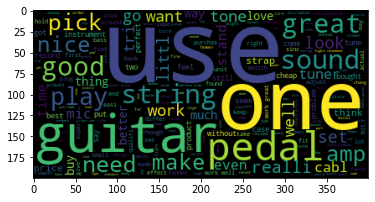

In [13]:
from wordcloud import WordCloud
wc=WordCloud()
text_data=" ".join(corpus)
wc_corpus=wc.generate(text_data)
plt.imshow(wc_corpus)

### Bag Of Words

In [14]:
#CountVectorizer -- Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [15]:
pd.DataFrame(x,columns=cv.get_feature_names())

,aa,aaa,aaaand,ab,aback,abalon,abandon,abb,abcd,abehring,...,zone,zoom,zt,zune,zvex,zwent,zylgian,zz,zzound,zzvhgwcolor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
x.shape

(10261, 13054)

In [18]:
len(cv.get_feature_names())

13054

### TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_tfidf=tfidf.fit_transform(corpus).toarray()

In [20]:
x_tfidf.shape

(10261, 13054)

In [32]:
pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names())

,aa,aaa,aaaand,ab,aback,abalon,abandon,abb,abcd,abehring,...,zone,zoom,zt,zune,zvex,zwent,zylgian,zz,zzound,zzvhgwcolor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y=dataset["target"]

In [31]:
y.shape

(10261,)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10256    1
10257    1
10258    1
10259    1
10260    1
Name: target, Length: 10261, dtype: int64

### ANN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
#Add input layer
model.add(Dense(input_dim=x_train.shape[1],kernel_initializer="random_uniform",activation="relu",units=250))
#Add hidden layers
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=250))
#Add output layer
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))
#compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               3263750   
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 3,326,751
Trainable params: 3,326,751
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(np.array(x_train),np.array(y_train),epochs=10,batch_size=32)

Train on 8208 samples
Epoch 1/10
8208/8208 [==============================] - 14s 2ms/sample - loss: 2.0231e-04 - accuracy: 0.9998
Epoch 2/10
8208/8208 [==============================] - 6s 710us/sample - loss: 1.8736e-04 - accuracy: 0.9999
Epoch 3/10
8208/8208 [==============================] - 6s 684us/sample - loss: 2.0392e-04 - accuracy: 0.9999
Epoch 4/10
8208/8208 [==============================] - 6s 708us/sample - loss: 1.9528e-04 - accuracy: 0.9998
Epoch 5/10
8208/8208 [==============================] - 6s 728us/sample - loss: 2.7161e-04 - accuracy: 0.9999
Epoch 6/10
8208/8208 [==============================] - 6s 720us/sample - loss: 7.2261e-04 - accuracy: 0.9999
Epoch 7/10
8208/8208 [==============================] - 6s 724us/sample - loss: 1.8969e-04 - accuracy: 0.9999
Epoch 8/10
8208/8208 [==============================] - 6s 723us/sample - loss: 1.8056e-04 - accuracy: 0.9999
Epoch 9/10
8208/8208 [==============================] - 6s 743us/sample - loss: 1.7820e-04 - accura

In [71]:
y_pred=model.predict_classes(x_test)

In [72]:
np.set_printoptions(precision=2,suppress=True)

In [73]:
# Evaluate the model 
from sklearn.metrics import accuracy_score
print("Test Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy Score: 89.38139308329274 %
